<a href="https://colab.research.google.com/github/Yamm23/Learning-Macine-Learning/blob/main/Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing necessary modules and datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
train_df = pd.read_csv('/content/drive/MyDrive/LearningAI_CSV/Titanic Dataset/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/LearningAI_CSV/Titanic Dataset/test.csv')

In [2]:
#Inspect Training Data
print("Training Data Head:")
print(train_df.head())
print("\nTraining Data Info:")
print(train_df.info())
print("\nTraining Data Description:")
print(train_df.describe())
print("\nMissing Values")
print(train_df.isnull().sum())

Training Data Head:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500

In [3]:
#Inspect Test Data
print("Test Data Head:")
print(test_df.head())
print("\nTest Data Info:")
print(test_df.info())
print("\nTest Data Description:")
print(test_df.describe())
print("\nMissing Values")
print(test_df.isnull().sum())

Test Data Head:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype

**Data Preprocessing**

In [ ]:
#Before encoding, checking the unique elements of the object type columns
print(train_df['Sex'].unique())
print(train_df['Embarked'].unique())
print(test_df['Sex'].unique())
print(test_df['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q' nan]
['male' 'female']
['Q' 'S' 'C']


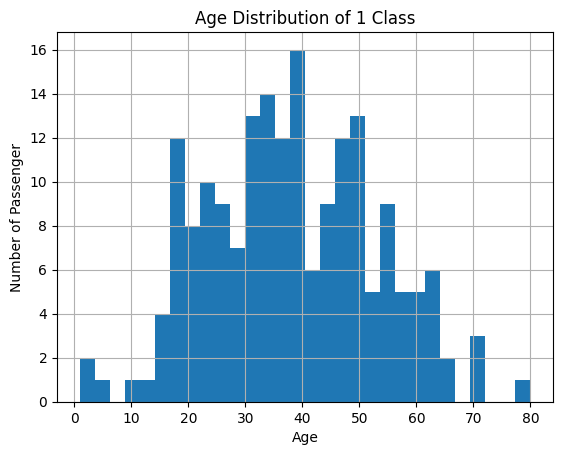

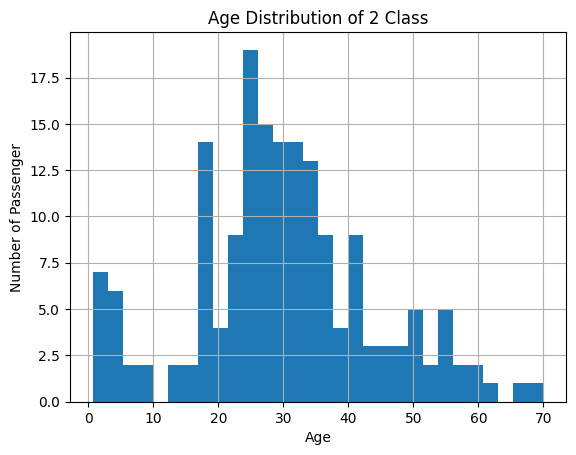

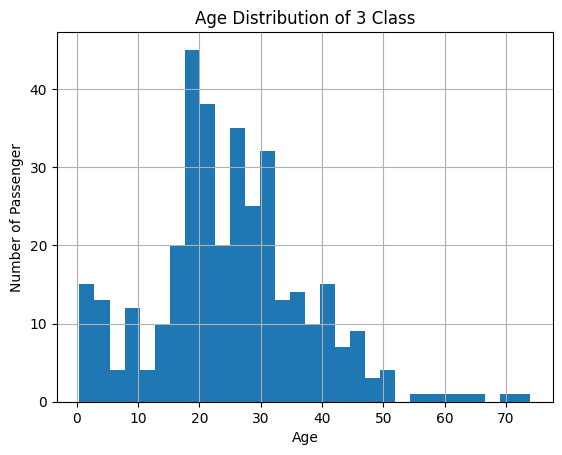

In [13]:
#Checking the age group for various passenger class.
for classes in sorted(train_df['Pclass'].unique()):
  plt.figure()
  train_df[train_df['Pclass']==classes]['Age'].hist(bins=30,alpha=1,)
  plt.title(f'Age Distribution of {classes} Class')
  plt.xlabel('Age')
  plt.ylabel('Number of Passenger')
  plt.show()

In [ ]:
#Removing any unecessary columns
train_df.drop(['Name','Ticket'])

In [ ]:
# Replace the null values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
# Encode categorical data
df['Sex']=df['Sex'].str.strip().str.lower().map({'male':0,'female':1})
df['Embarked']=df['Embarked'].map({'C':0,'S':1,'Q':2})
# Removing Useless Features
df = df.drop(['Name', 'Ticket', 'PassengerId','Cabin'], axis=1)

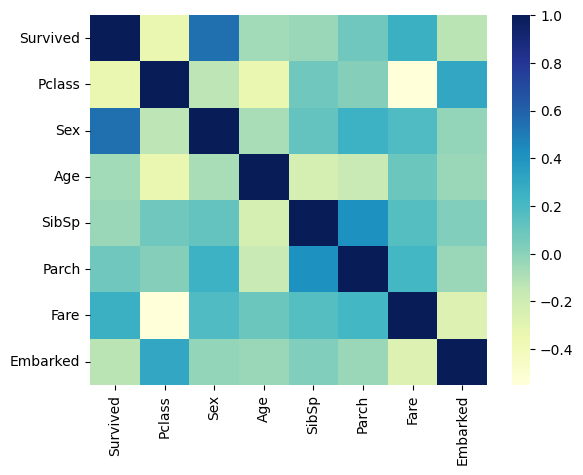

In [ ]:
sns.heatmap(df.corr(),cmap = 'YlGnBu')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Survived',axis = 1)
Y = df['Survived']
X_train, X_val, Y_train, Y_val = train_test_split(X,Y,test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
Y_pred = model.predict(X_val)
print('Validation Accuracy:', accuracy_score(Y_val, Y_pred))

Validation Accuracy: 0.8212290502793296


In [ ]:
new_data = np.array([[2,1,50.0,2,1,65.53,1]])
prediction = model.predict(new_data)
prediction

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

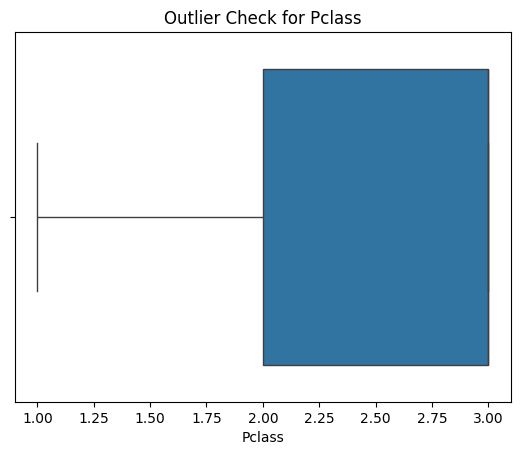

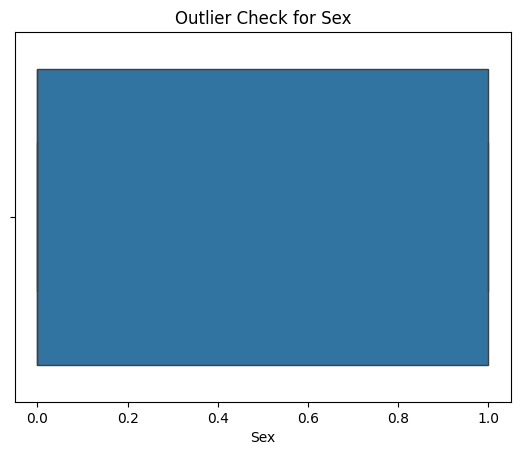

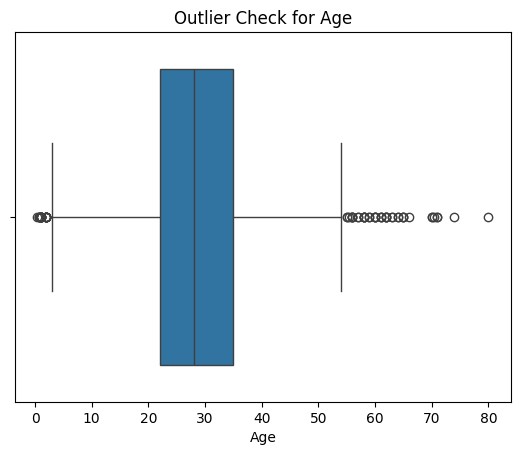

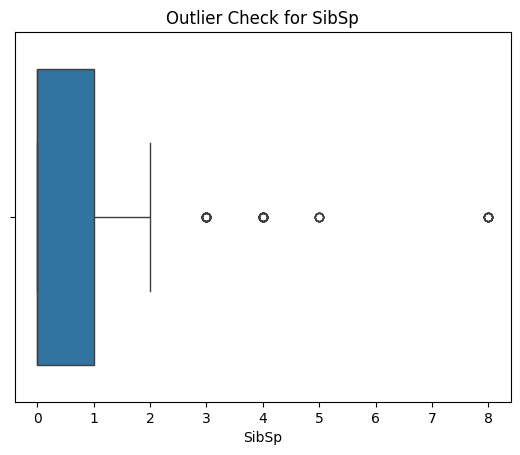

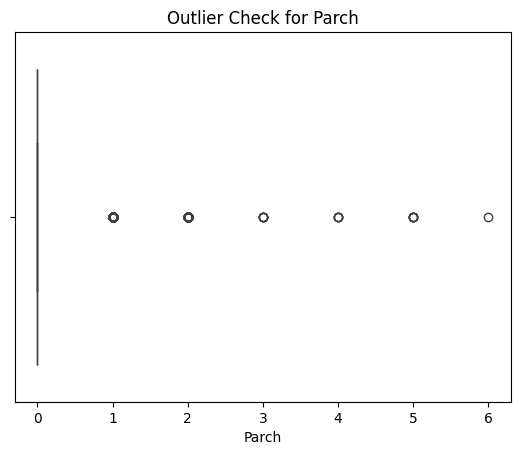

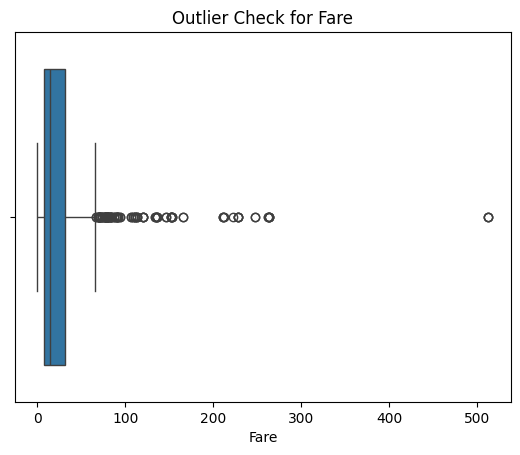

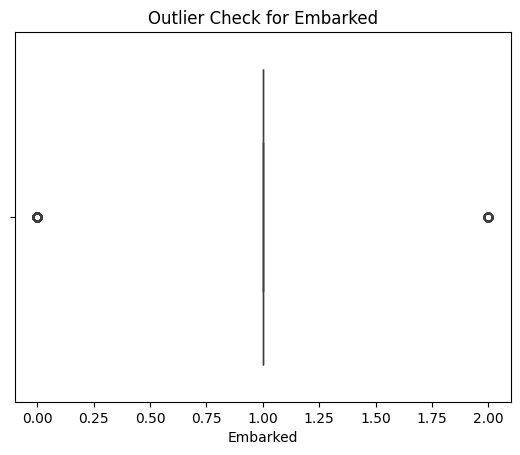

In [ ]:
for col in X.select_dtypes(include=[np.number]).columns:
    sns.boxplot(x=X[col])
    plt.title(f'Outlier Check for {col}')
    plt.show()